# Fashion MNIST 손글씨 - CNN v1



- 2 x conv2D layers
- 1 FCN layer
- 1 Dropput
- MaxPooling2D
- l output layer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
seed = 2022
np.random.seed(seed)
tf.random.set_seed(seed)

In [6]:
from tensorflow.keras.datasets import fashion_mnist
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()
X_train.shape

4431872/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

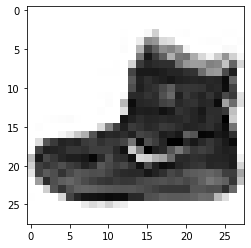

In [7]:
plt.imshow(X_train[0], cmap='Greys')

In [8]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


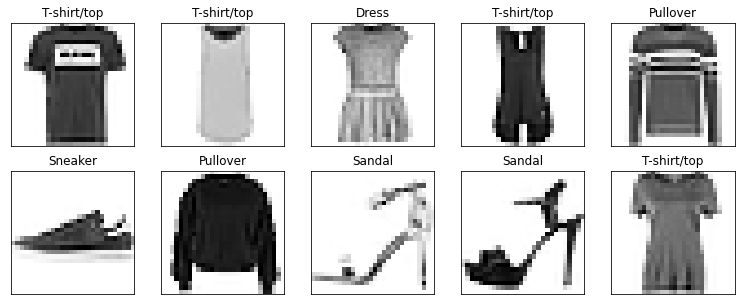

In [12]:
plt.figure(figsize=(13,5))
for i in range(1,11):
    plt.subplot(2, 5, i)
    plt.imshow(X_train[i], cmap='Greys')
    plt.title(class_names[Y_train[i]])
    plt.xticks([]), plt.yticks([])
plt.show()

- 데이터 전처리

In [13]:
# X_train, X_test 정규화(0~1), 이미지 차원 변경

X_train = X_train.reshape(-1, 28, 28, 1) / 255.
X_test = X_test.reshape(-1, 28, 28, 1) / 255.
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [14]:
from tensorflow.keras.utils import to_categorical
Y_train = to_categorical(Y_train)
Y_test = to_categorical(Y_test)
Y_train.shape, Y_test.shape

((60000, 10), (10000, 10))

 - 모델 정의 / 설정/ 학습 / 평가

In [26]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [16]:
model = Sequential([
    Conv2D(32, kernel_size=(3,3), input_shape=(28,28,1), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(), # MaxPooling2D(poll_size=(2,2))
    Dropout(0.25),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [17]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

In [18]:
model_path = 'best_fashion_mnist_cnn_v1.h5'
mc = ModelCheckpoint(model_path, save_best_only=True, verbose=1)
es = EarlyStopping(patience=10)

In [19]:
hist1 = model.fit(X_train, Y_train, validation_split=0.2,
          epochs=10000, batch_size=200,
          callbacks = [mc,es])

Epoch 1/10000
237/240 [============================>.] - ETA: 0s - loss: 0.5033 - accuracy: 0.8212
Epoch 1: val_loss improved from inf to 0.32688, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 15s 15ms/step - loss: 0.5019 - accuracy: 0.8217 - val_loss: 0.3269 - val_accuracy: 0.8800
Epoch 2/10000
236/240 [============================>.] - ETA: 0s - loss: 0.3145 - accuracy: 0.8863
Epoch 2: val_loss improved from 0.32688 to 0.27610, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.3142 - accuracy: 0.8864 - val_loss: 0.2761 - val_accuracy: 0.8987
Epoch 3/10000
239/240 [============================>.] - ETA: 0s - loss: 0.2618 - accuracy: 0.9046
Epoch 3: val_loss improved from 0.27610 to 0.23548, saving model to best_fashion_mnist_cnn_v1.h5
240/240 [==============================] - 3s 14ms/step - loss: 0.2619 - accuracy: 0.9045 - val_loss: 0.2355 - val_accuracy: 0.9129
Epoch 4/10000
239/2

In [20]:
model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2538 - accuracy: 0.9273


[0.25378164649009705, 0.927299976348877]

In [27]:
best_model = load_model(model_path)
best_model.evaluate(X_test, Y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2187 - accuracy: 0.9232


[0.2186710685491562, 0.9232000112533569]

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 512)               4719104   
                                                        

In [22]:
y_acc1 = hist1.history['accuracy']
y_vloss1 = hist1.history['val_loss']
xs1 = np.arange(1, len(y_acc1) + 1)

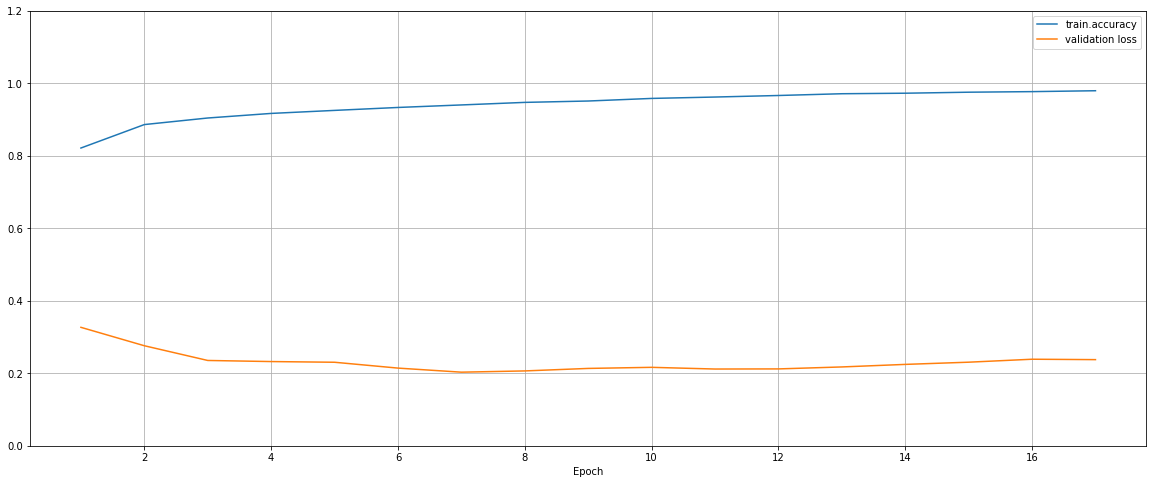

In [23]:
plt.figure(figsize=(20, 8))
plt.plot(xs1, y_acc1, label='train.accuracy')
plt.plot(xs1, y_vloss1, label='validation loss')
plt.legend(), plt.grid()
plt.ylim([0,1.2])
plt.xlabel('Epoch')
plt.show()